# Verifying rotation function - Data pre processing 

In [33]:
import tensorflow as tf
import numpy as np
import os
import meta
%pylab inline
from matplotlib.patches import Rectangle
from PIL import *
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Below is the only config needed for the jupyter notebook - give filenames to data to be inspected

In [34]:
filenames = [os.path.join('/home/olle/PycharmProjects/digits/models/resnet/data/test', 'test.tfrecords')]

# Create a queue that produces the filenames to read.
filename_queue = tf.train.string_input_producer(filenames)

In [35]:
class SVHNRecord(object):
    pass

result = SVHNRecord()

# Dimensions of the images in the SVHN dataset.
# See http://ufldl.stanford.edu/housenumbers/ for a description of the
# input format.
result.height = 32
result.width = 32
result.depth = 3

reader = tf.TFRecordReader()
result.key, value = reader.read(filename_queue)
value = tf.parse_single_example(
    value,
    # Defaults are not specified since both keys are required.
    features={
        'image_raw': tf.FixedLenFeature(shape=[], dtype=tf.string),
        'label': tf.FixedLenFeature(shape=[], dtype=tf.int64),
    })

# Convert from a string to a vector of uint8 that is record_bytes long.
record_bytes = tf.decode_raw(value['image_raw'], tf.uint8)
# record_bytes.set_shape([32*32*3])
record_bytes = tf.reshape(record_bytes, [32, 32, 3])
print("record bytes::::: ", record_bytes)
# Store our label to result.label and convert to int32
result.label = tf.cast(value['label'], tf.int32)
result.uint8image = record_bytes


('record bytes::::: ', <tf.Tensor 'Reshape_4:0' shape=(32, 32, 3) dtype=uint8>)


In [36]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

# Display of of not rotates image

In [37]:
image_val = sess.run([result.uint8image])[0]

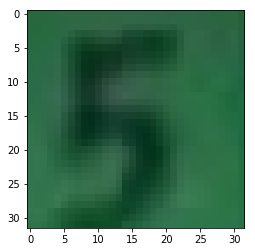

In [38]:
img = Image.fromarray(image_val, 'RGB')

plt.imshow(img, interpolation='nearest')

plt.show()

# Display of same image rotated

In [39]:
#sppecifying angles for images to be rotated by
number_of_samples = len(filenames)
angles = np.random.uniform(low = 0.0, high= 360.0, size=number_of_samples)

rotated_image = tf.contrib.image.rotate(result.uint8image, angles, interpolation='BILINEAR')


In [40]:
rotated_image_val = sess.run([rotated_image])[0]

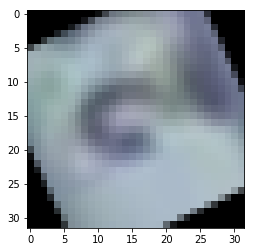

In [41]:
rotated_img = Image.fromarray(rotated_image_val, 'RGB')

plt.imshow(rotated_img, interpolation='nearest')

plt.show()